## Load and Review Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
raw_data = pd.read_csv('./data/US/combined_listings.csv')
# data = pd.read_csv('sandiego_listings.csv')
print(raw_data.columns)
raw_data.head()

C:\Users\sangd\AppData\Local\Temp\ipykernel_3388\1979445493.py:1: DtypeWarning: Columns (28,29,68) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_data = pd.read_csv('./data/US/combined_listings.csv')


Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,109,https://www.airbnb.com/rooms/109,20240607021552,2024-06-07,city scrape,Amazing bright elegant condo park front *UPGRA...,"*** Unit upgraded with new bamboo flooring, ne...",NaN,https://a0.muscache.com/pictures/miso/Hosting-...,521,...,4.00,5.00,4.00,NaN,f,1,1,0,0,0.01
1,2708,https://www.airbnb.com/rooms/2708,20240607021552,2024-06-08,city scrape,Runyon Canyon | Beau Furn Mirror Mini-Suite Fi...,"Run Runyon Canyon, Our Gym & Sauna Open <br />...","Walk and run to Runyon Canyon, it is open!<br ...",https://a0.muscache.com/pictures/miso/Hosting-...,3008,...,4.98,4.95,4.88,NaN,t,2,0,2,0,0.34
2,24349,https://www.airbnb.com/rooms/24349,20240607021552,2024-06-07,city scrape,"The Wolford House, a Mid Century Hilltop Jewel",Gather for sun-dappled alfresco lunches at a s...,"Tucked away atop Mount Washington, the propert...",https://a0.muscache.com/pictures/819ea537-72c2...,98565,...,5.00,4.98,4.92,HSR21-002783,f,1,1,0,0,1.62
3,2732,https://www.airbnb.com/rooms/2732,20240607021552,2024-06-08,city scrape,Zen Life at the Beach,An oasis of tranquility awaits you.,"This is the best part of Santa Monica. Quiet, ...",https://a0.muscache.com/pictures/1082974/0f74c...,3041,...,4.48,4.91,4.22,228269,f,2,1,1,0,0.15
4,25670,https://www.airbnb.com/rooms/25670,20240607021552,2024-06-08,city scrape,Charming accommodations in Westwood/West LA,"Central, convenient, cozy 3room accommodations...","quiet, residential, safe, easy frwy access( (p...",https://a0.muscache.com/pictures/17748938/d583...,107370,...,4.95,4.84,4.37,Exempt - This listing is a bed and breakfast,f,1,1,0,0,0.12


In [3]:
raw_data.shape

(276371, 75)

In [5]:
data_few_feature = raw_data[['longitude', 'latitude', 'room_type', 'price', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'minimum_nights', 'review_scores_rating', 'number_of_reviews', 'calculated_host_listings_count', 'availability_30', 'availability_60']] # 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm','host_response_rate', 'host_acceptance_rate' , 'availability_90', 'availability_365'
print(data_few_feature.columns)
print(data_few_feature.shape)

Index(['longitude', 'latitude', 'room_type', 'price', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'minimum_nights',
       'review_scores_rating', 'number_of_reviews',
       'calculated_host_listings_count', 'availability_30', 'availability_60'],
      dtype='object')
(276371, 14)


In [6]:
# Drop rows that include NA values.
cleaned_data = data_few_feature.dropna()
print(cleaned_data.isnull().sum())
print(cleaned_data.shape)

longitude                         0
latitude                          0
room_type                         0
price                             0
accommodates                      0
bathrooms                         0
bedrooms                          0
beds                              0
minimum_nights                    0
review_scores_rating              0
number_of_reviews                 0
calculated_host_listings_count    0
availability_30                   0
availability_60                   0
dtype: int64
(185220, 14)


In [7]:
# Convert room_type into integer values
print(cleaned_data['room_type'].unique())
room_type_dict = {'Entire home/apt':0, 'Private room':1, 'Shared room':2, 'Hotel room':3} # might be changed later
cleaned_data['room_type'] = cleaned_data['room_type'] .replace(room_type_dict)
print(cleaned_data['room_type'].unique())

['Entire home/apt' 'Private room' 'Shared room' 'Hotel room']
[0 1 2 3]


C:\Users\sangd\AppData\Local\Temp\ipykernel_3388\1018206294.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cleaned_data['room_type'] = cleaned_data['room_type'] .replace(room_type_dict)
C:\Users\sangd\AppData\Local\Temp\ipykernel_3388\1018206294.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['room_type'] = cleaned_data['room_type'] .replace(room_type_dict)


In [8]:
# Parse price froms str to float
cleaned_data['price'] = cleaned_data['price'].str.replace('$', '').str.replace(',', '').astype(float)
cleaned_data.describe().round(3)

C:\Users\sangd\AppData\Local\Temp\ipykernel_3388\2029159857.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['price'] = cleaned_data['price'].str.replace('$', '').str.replace(',', '').astype(float)


,longitude,latitude,room_type,price,accommodates,bathrooms,bedrooms,beds,minimum_nights,review_scores_rating,number_of_reviews,calculated_host_listings_count,availability_30,availability_60
count,185220.000,185220.000,185220.000,185220.000,185220.000,185220.000,185220.000,185220.000,185220.000,185220.000,185220.000,185220.000,185220.000,185220.000
mean,-107.143,34.297,0.206,265.328,4.500,1.543,1.770,2.362,10.419,4.790,61.108,23.900,12.275,29.788
std,26.274,7.225,0.439,1557.129,2.974,0.900,1.289,2.019,19.462,0.357,99.722,67.398,10.348,19.800
min,-159.715,18.920,0.000,6.000,1.000,0.000,0.000,0.000,1.000,1.000,1.000,1.000,0.000,0.000
25%,-121.908,30.255,0.000,100.000,2.000,1.000,1.000,1.000,1.000,4.740,6.000,1.000,3.000,13.000
50%,-115.140,34.182,0.000,160.000,4.000,1.000,1.000,2.000,2.000,4.890,23.000,3.000,10.000,29.000
75%,-82.567,40.636,0.000,266.000,6.000,2.000,2.000,3.000,28.000,5.000,73.000,13.000,21.000,48.000
max,-70.996,47.734,3.000,100000.000,16.000,17.000,50.000,61.000,1000.000,5.000,3689.000,842.000,30.000,60.000


### crop some outliners

Seem like the data is still very skewed, we're gonna crop some outliners

In [9]:
# https://medium.com/analytics-vidhya/removing-outliers-understanding-how-and-what-behind-the-magic-18a78ab480ff
# Function to remove outliers using IQR
def remove_outliers_iqr(df, columns, th1=0.01, th3=0.90, multiplier=1.5):
    for column in columns:
        Q1 = df[column].quantile(th1)
        Q3 = df[column].quantile(th3)
        IQR = Q3 - Q1
        lower_bound = Q1 - multiplier * IQR
        upper_bound = Q3 + multiplier * IQR
        print(f"column: {column}, lower_bound: {lower_bound}, upper_bound: {upper_bound}")
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    return df
# consider: Removing Outliers using Standard Deviation (probably not good because data is not normally distributed)
# cleaned_data columns: 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365','number_of_reviews_ltm'
cleaned_data_no_outliers = remove_outliers_iqr(cleaned_data, ['price'],th3=0.6, multiplier=1.5)
cleaned_data_no_outliers.describe()

column: price, lower_bound: -205.0, upper_bound: 435.0


,longitude,latitude,room_type,price,accommodates,bathrooms,bedrooms,beds,minimum_nights,review_scores_rating,number_of_reviews,calculated_host_listings_count,availability_30,availability_60
count,165896.000000,165896.000000,165896.000000,165896.000000,165896.000000,165896.000000,165896.000000,165896.000000,165896.000000,165896.000000,165896.000000,165896.000000,165896.000000,165896.000000
mean,-106.370128,34.503960,0.222826,167.768246,4.057126,1.397942,1.578983,2.090496,10.823058,4.783288,64.036842,22.639732,12.218360,29.837085
std,25.818052,7.154332,0.447806,93.286382,2.534447,0.688152,1.083864,1.641295,19.740141,0.360719,103.240563,65.100975,10.375231,19.869185
min,-159.712090,18.920250,0.000000,6.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,-121.847980,30.269765,0.000000,96.000000,2.000000,1.000000,1.000000,1.000000,1.000000,4.730000,6.000000,1.000000,2.000000,12.000000
50%,-114.088370,35.445620,0.000000,148.000000,4.000000,1.000000,1.000000,2.000000,2.000000,4.880000,25.000000,3.000000,10.000000,30.000000
75%,-82.529637,40.654519,0.000000,223.000000,6.000000,2.000000,2.000000,3.000000,29.000000,5.000000,77.000000,12.000000,21.000000,48.000000
max,-70.996000,47.734087,3.000000,435.000000,16.000000,17.000000,50.000000,36.000000,1000.000000,5.000000,3689.000000,842.000000,30.000000,60.000000


count    165896.000000
mean        167.768246
std          93.286382
min           6.000000
25%          96.000000
50%         148.000000
75%         223.000000
max         435.000000
Name: price, dtype: float64

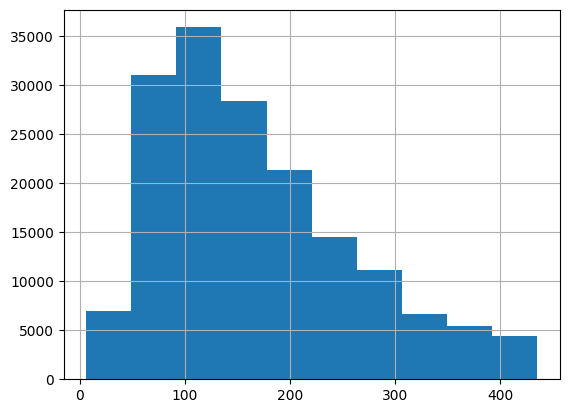

In [10]:
cleaned_data_no_outliers['price'].hist()
cleaned_data_no_outliers['price'].describe()

### income_group

It'd be good to divide the group based on the percentiles. This would allows the group proportion to be equal, and the values look quite reasonable

In [13]:
first_quartile = cleaned_data_no_outliers['price'].quantile(0.25)
second_quartile = cleaned_data_no_outliers['price'].quantile(0.5)
third_quartile = cleaned_data_no_outliers['price'].quantile(0.75)
fourth_quartile = cleaned_data_no_outliers['price'].quantile(1)

cleaned_data_no_outliers['price_group'] = cleaned_data_no_outliers['price'].apply(lambda x: 0 if x < first_quartile else 1 if x < second_quartile else 2 if x < third_quartile else 3)

# data['income_group'] = cleaned_data_no_outliers['price'].apply(lambda x: 0 if x < 750 else 1 if x < 1500 else 2 if x < 2250 else 3)

cleaned_data_no_outliers['price_group'].value_counts()



C:\Users\sangd\AppData\Local\Temp\ipykernel_3388\161782430.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data_no_outliers['price_group'] = cleaned_data_no_outliers['price'].apply(lambda x: 0 if x < first_quartile else 1 if x < second_quartile else 2 if x < third_quartile else 3)


price_group
3    41639
1    41489
2    41407
0    41361
Name: count, dtype: int64

## Data Prep

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler

In [15]:
cleaned_data_no_outliers = cleaned_data_no_outliers.drop(columns=['price'])

In [17]:
X = cleaned_data_no_outliers.drop(columns=['price_group'])
y = cleaned_data_no_outliers['price_group']

In [18]:
min_max_scaler = MinMaxScaler()

X = min_max_scaler.fit_transform(X)

### Split data to train and test, one hot encode target

In [24]:
#OHE
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False) #
y_onehot = encoder.fit_transform(y.values.reshape(-1, 1))

X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2, random_state=42)

## Model

In [53]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.regularizers import L2, L1

### Hyperparameters

In [54]:
input_size = X_train.shape[1]
num_classes = y_train.shape[1]
batch_size = 500
epochs = 200
learning_rate = 0.001
print(input_size)
print(num_classes)

13
4


### Model Init

In [59]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(input_size,))) #, kernel_regularizer=L2(0.01)
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu')) #,kernel_regularizer=L1(0.01)
model.add(Dropout(0.1))
model.add(Dense(256, activation='relu')) #
model.add(Dropout(0.1))
model.add(Dense(256, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), metrics=['accuracy'])
# model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 512)               7168      
                                                                 
 dropout_13 (Dropout)        (None, 512)               0         
                                                                 
 dense_22 (Dense)            (None, 512)               262656    
                                                                 
 dropout_14 (Dropout)        (None, 512)               0         
                                                                 
 dense_23 (Dense)            (None, 256)               131328    
                                                                 
 dropout_15 (Dropout)        (None, 256)               0         
                                                                 
 dense_24 (Dense)            (None, 256)              

## Train

In [60]:
callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test), verbose=1, callbacks=[callback]) #

Epoch 1/200
266/266 [==============================] - 7s 23ms/step - loss: 1.1158 - accuracy: 0.4923 - val_loss: 1.0559 - val_accuracy: 0.5226
Epoch 2/200
266/266 [==============================] - 6s 21ms/step - loss: 1.0611 - accuracy: 0.5192 - val_loss: 1.0436 - val_accuracy: 0.5258
Epoch 3/200
266/266 [==============================] - 6s 21ms/step - loss: 1.0463 - accuracy: 0.5238 - val_loss: 1.0276 - val_accuracy: 0.5370
Epoch 4/200
266/266 [==============================] - 5s 20ms/step - loss: 1.0375 - accuracy: 0.5285 - val_loss: 1.0347 - val_accuracy: 0.5313
Epoch 5/200
266/266 [==============================] - 5s 20ms/step - loss: 1.0331 - accuracy: 0.5296 - val_loss: 1.0332 - val_accuracy: 0.5345
Epoch 6/200
266/266 [==============================] - 5s 20ms/step - loss: 1.0292 - accuracy: 0.5334 - val_loss: 1.0155 - val_accuracy: 0.5400
Epoch 7/200
266/266 [==============================] - 5s 20ms/step - loss: 1.0228 - accuracy: 0.5351 - val_loss: 1.0110 - val_accuracy:

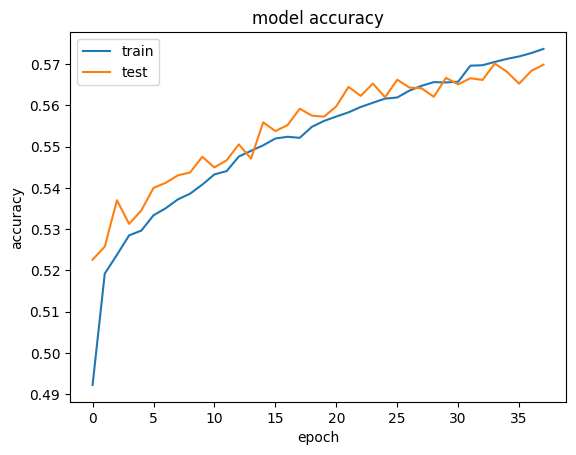

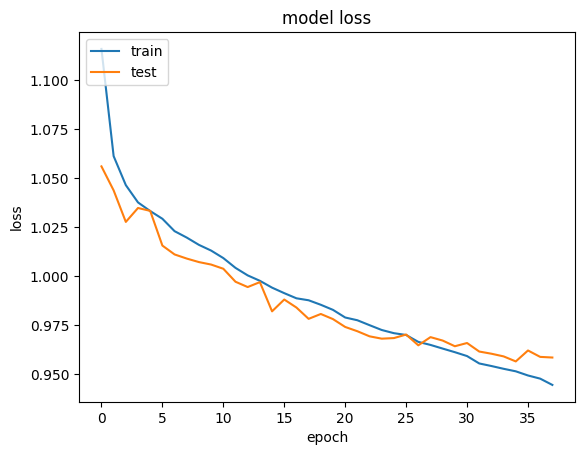

In [61]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [65]:
yhat_test = model.predict(X_test).round(3)
yhat_test_idx = np.argmax(yhat_test, axis=1)
y_labels = y_test
y_labels_idx = np.argmax(y_labels, axis=1)
# print(yhat_test*100)
# for i in zip(yhat_test_idx, y_labels_idx):
#     print(i)

1037/1037 [==============================] - 3s 2ms/step


## Result

We predict the income group of 10 random samples. The accuracy is about 50% as expected. Even when the model predict the income group wrongly, the actual income group still have a decent likelyhood, it usually get the second highest likely hood, if not the best.

In [ ]:
# def predict(idx, r):
#     yhat_test = model.predict(X_test[idx:idx+r]).round(3)
#     yhat_test_idx = np.argmax(yhat_test, axis=1)
#     y_labels = y_test[idx:idx+r]
#     y_labels_idx = np.argmax(y_labels, axis=1)
#     # print(yhat_test*100)
#     for i in zip(yhat_test*100, yhat_test_idx, y_labels_idx):
#         print(f"predict%: {i[0]} = {i[1]} | actual: {i[2]} | %ofActual: {i[0][i[2]]}")
#         group_names = [f"{i}" for i in [first_quartile, second_quartile, third_quartile, fourth_quartile]]
#         barlist = plt.bar(group_names, i[0])
#         barlist[i[2]].set_color('r')
#         plt.xlabel('income group')
#         plt.ylabel('likelyhood')
#         plt.show()
# predict(8653, 10)

1/1 [==============================] - 0s 12ms/step


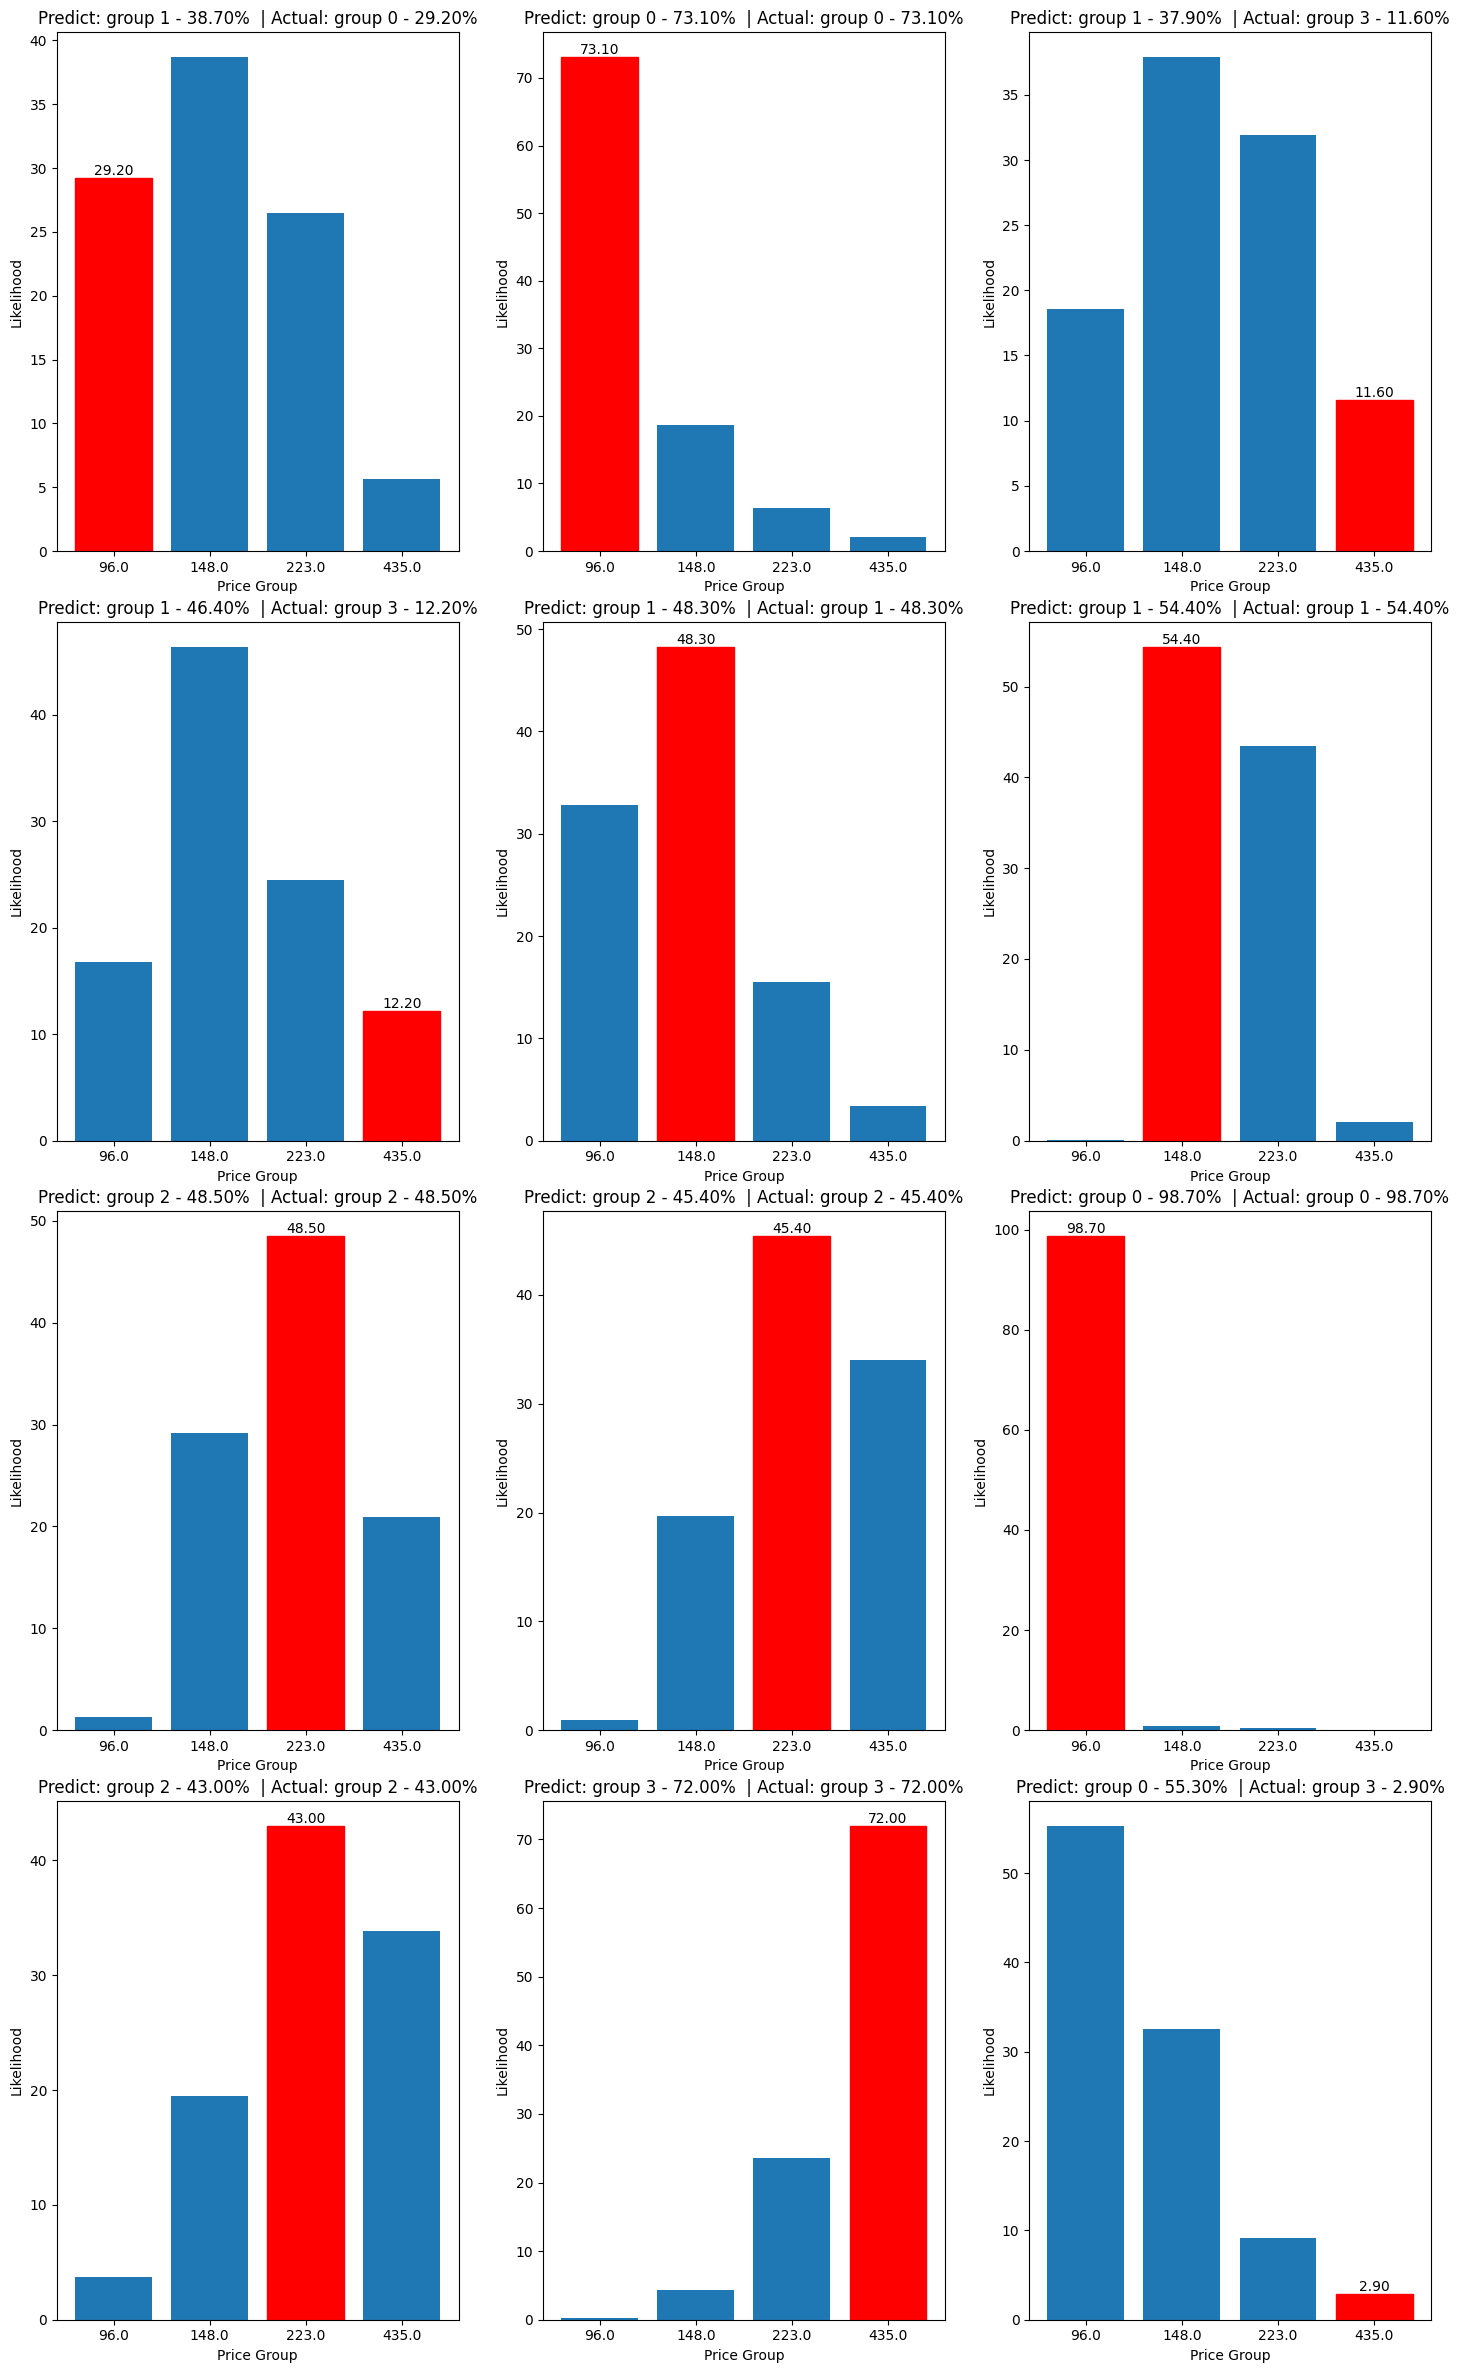

In [68]:
def predict(idx, r):
    yhat_test = model.predict(X_test[idx:idx+r]).round(3)
    yhat_test_idx = np.argmax(yhat_test, axis=1)
    y_labels = y_test[idx:idx+r]
    y_labels_idx = np.argmax(y_labels, axis=1)

    fig, axes = plt.subplots(nrows=len(range(idx, idx+r, 3)), ncols=3, figsize=(15, 6*len(range(idx, idx+r, 3))))
    fig.tight_layout(pad=3.0)

    for i, ax in enumerate(axes.flat):
        if i < len(yhat_test*100):
            predict_percent = yhat_test*100
            predict_idx = yhat_test_idx
            actual_idx = y_labels_idx
            group_names = [f"{i}" for i in [first_quartile, second_quartile, third_quartile, fourth_quartile]]
            barlist = ax.bar(group_names, predict_percent[i], width=0.8)
            barlist[actual_idx[i]].set_color('r')
            ax.set_xlabel('Price Group')
            ax.set_ylabel('Likelihood')
            ax.set_title(f"Predict: group {predict_idx[i]} - {predict_percent[i][predict_idx[i]]:.2f}%  | Actual: group {actual_idx[i]} - {predict_percent[i][actual_idx[i]]:.2f}%")
            ax.text(actual_idx[i], predict_percent[i][actual_idx[i]], f"{predict_percent[i][actual_idx[i]]:.2f}", ha='center', va='bottom')
    plt.show()
predict(3265, 12)

<Axes: >

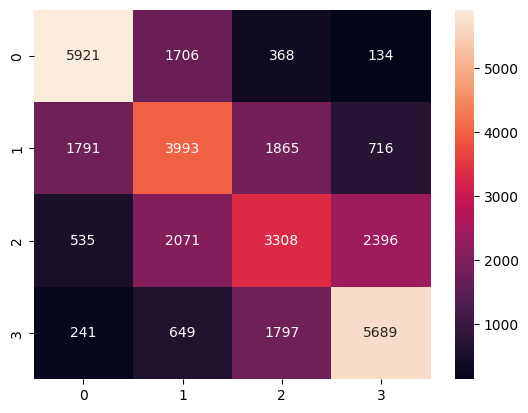

In [66]:
cm = confusion_matrix(y_labels_idx, yhat_test_idx)
sns.heatmap(cm, annot=True, fmt='d')

In [67]:
print(classification_report(y_labels_idx, yhat_test_idx))

              precision    recall  f1-score   support

           0       0.70      0.73      0.71      8129
           1       0.47      0.48      0.48      8365
           2       0.45      0.40      0.42      8310
           3       0.64      0.68      0.66      8376

    accuracy                           0.57     33180
   macro avg       0.56      0.57      0.57     33180
weighted avg       0.56      0.57      0.57     33180



## Save Model

In [34]:
model.save('classification_model.keras')

## Cross-validation (probably not necessary, since our accuracy is pretty high)

# Suggesting Model

### TODO:
  1. Write script that asks for user input
  2. redo StardardScaler and MinMaxScaler, we need to record the meand and std of each column, so we can stardardize and normalize user input manually
  3. Feed user input to Price Predicting model, get price range
  4. For each price, feed user input + price to this classification model
  5. Report the likelyhood of monthly income, suggest ideal price of the listing